<h1><center>TP 3 : Polynomial Regression</center></h1>  <center>_______________________________________________________________________________________________________</center>

<h6 style="text-align:right;"> ACHRAF DIANI</h6>  <h6 style="text-align:right;">MOHAMMED OUALID DAOUDI</h6>

##1- Visualize the graph relating the pressure to the temperature.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv(r'/content/pressure.csv')
dataset

,rownames,temperature,pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700
6,7,120,0.7500
7,8,140,1.8500
8,9,160,4.2000
9,10,180,8.8000


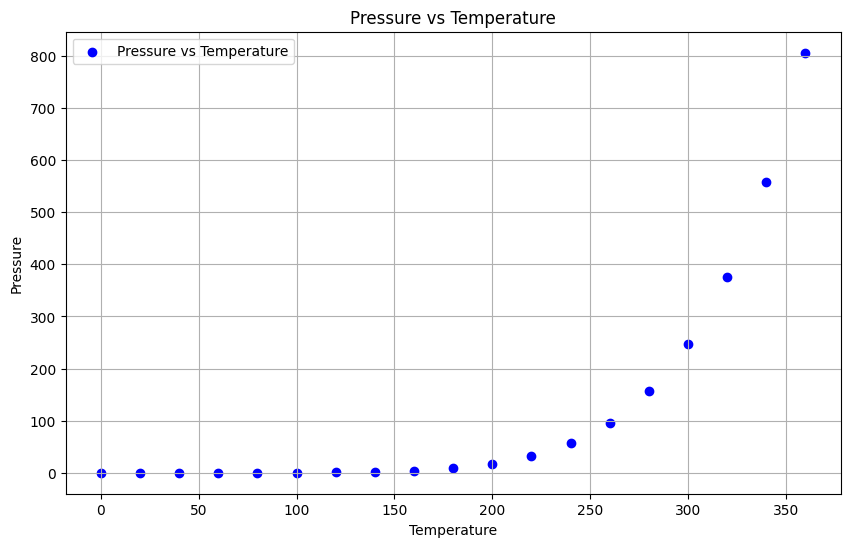

In [ ]:
temperature = dataset['temperature']
pressure = dataset['pressure']
plt.figure(figsize=(10, 6))
plt.scatter(temperature, pressure, marker='o', color='blue', label='Pressure vs Temperature')
plt.title('Pressure vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.grid(True)
plt.legend()
plt.show()

##2- What can you notice from the graph?

We can notice from the graph that the relation between the temperature and the pressure isn’t linear
but it is in fact a polynomial relation.

##3- Use linear regression model to capture the relationship between the inputs and the outputs of the data. Then, return the empirical error


In [ ]:
def linear_regression_gradient_descent(X, Y, learning_rate, num_iterations):
    n = len(X)
    w = 0
    b = 0

    for _ in range(num_iterations):
        gradient_w, gradient_b = gradient_mse(X, Y, w, b)
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b

    return w, b

def MSE(X, Y, w, b):
    n = len(X)
    Y_pred = X * w + b
    squared_errors = (Y - Y_pred) ** 2
    mse = np.mean(squared_errors)
    return mse

def gradient_mse(X, Y, w, b):
    n = len(X)
    Y_pred = X * w + b
    gradient_w = (-2 / n) * np.sum(X * (Y - Y_pred))
    gradient_b = (-2 / n) * np.sum(Y - Y_pred)
    return gradient_w, gradient_b

In [ ]:
temperature = dataset['temperature']
pressure = dataset['pressure']

learning_rate = 0.00001
num_iterations = 1000

w = 0
b = 0

w, b = linear_regression_gradient_descent(temperature, pressure, learning_rate, num_iterations)

mse = MSE(temperature, pressure, w, b)
print("Mean Squared Error:", mse)

Mean Squared Error: 26199.415245993907


##4- Visualize linear model in the constructed graph.

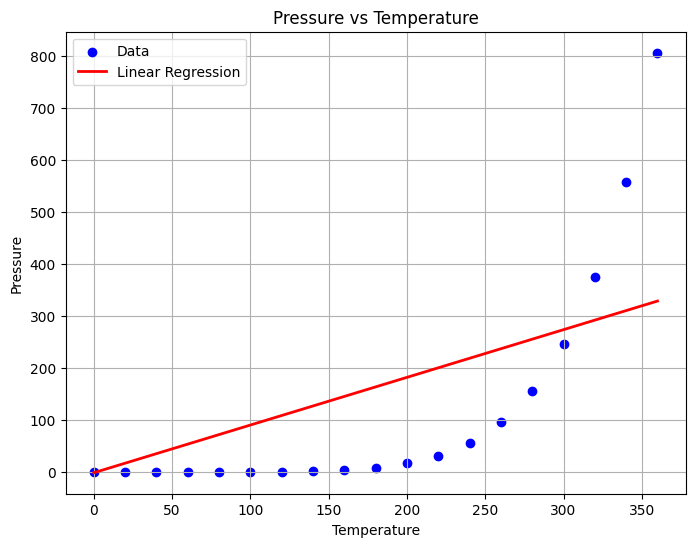

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(temperature, pressure, c='blue', marker='o', label='Data')
plt.title('Pressure vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

regression_line = w * temperature + b
plt.plot(temperature, regression_line, color='red', linewidth=2, label='Linear Regression')

plt.legend()
plt.grid(True)
plt.show()

##5- Comment your result.

We can see from the empirical loss and the graph that as was expected the linear regression
model won’t represent well the data, due to the fact that there is no linear relation between the
variables.

##6- Now, fit the data with polynomial regression model. Try different polynomial orders (Q=2, 3, 4) and in each time compute the empirical error.
##7- Draw the different polynomial regression models in the same graph. What do you notice?


FINAL RESULTS Order 2:
Optimal weight vector: [  91.15437925 -270.61669207  117.18296661]
Empirical loss: 4663.51470010317

FINAL RESULTS Order 3:
Optimal weight vector: [ -32.84694668  208.57143838 -224.73245416   63.31767051]
Empirical loss: 517.9358480295871

FINAL RESULTS Order 4:
Optimal weight vector: [   6.45329033  -79.91927204  158.8248018  -105.24952255   23.41211015]
Empirical loss: 21.326410440144095


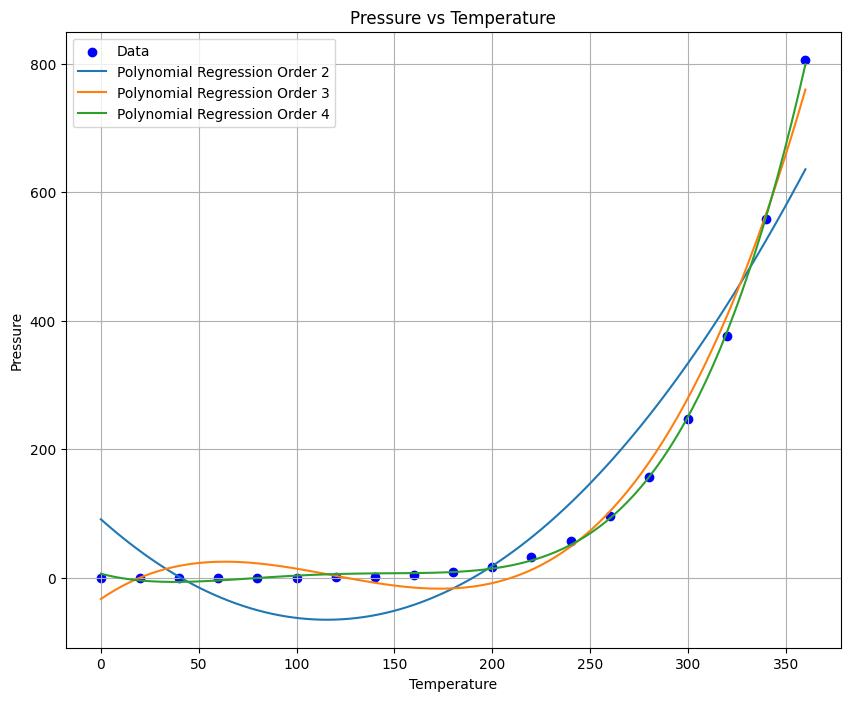

In [ ]:
def polynomial_regression(X, Y, Q):
    X_poly = np.column_stack([X**i for i in range(1, Q + 1)])
    X_poly = np.insert(X_poly, 0, 1, axis=1)
    w = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ Y
    return w

def polynomial_function(w, x):
    return np.polyval(w[::-1], x)

def mse_polynomial(X, Y, w):
    Y_pred = polynomial_function(w, X)
    squared_errors = (Y - Y_pred) ** 2
    mse = np.mean(squared_errors)
    return mse

temperature = dataset['temperature'].values
pressure = dataset['pressure'].values
X_scaled = temperature / 100

plt.figure(figsize=(10, 8))
plt.scatter(temperature, pressure, c='blue', marker='o', label='Data')
plt.title('Pressure vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
for order in [2, 3, 4]:
    weights = polynomial_regression(X_scaled, pressure, order)
    x_range = np.linspace(min(temperature), max(temperature), 100)
    y_range = polynomial_function(weights, x_range / 100)
    plt.plot(x_range, y_range, label=f'Polynomial Regression Order {order}')

    print(f"\nFINAL RESULTS Order {order}:")
    print(f"Optimal weight vector: {weights}")
    print(f"Empirical loss: {mse_polynomial(X_scaled, pressure, weights)}")

plt.legend()
plt.grid(True)
plt.show()

We notice that if we increase the polynomial regression order, the empirical loss becomes smaller, means that the accuracy incease. That's why we can see that the best polynomial regression model is the order 4 (Q=4).

##8- Compare the result of the best polynomial regression model with the linear regression model. What is the best model?  

We can see that the polynomial regression model represent well the data, andgives more accurate results, unlike the linear regression
model, and this is due to the nature of the dataset.